In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Gk=0.36;Gna=1.2;Gl=0.003; C=0.01;
Ek=(-72.14) ; Ena=55.17 ; El=-49.42;
isPoisson = False ; rate = 0.32
domain = 120 ; res = 0.01
tspan = np.arange(0,domain,res)

In [0]:
if isPoisson:
    poisson1 = np.random.poisson(rate,len(tspan))
    poisson = np.zeros(len(tspan))
    length = np.where(tspan == 20)[0][0]
    
    for i in range(len(tspan)):
        if poisson1[i] > 1:
            poisson1[i] = 1
        for j in range(length):
            if i*length + j < len(poisson):
                poisson[i*length + j] = poisson1[i]
            else:
                break
#plt.plot(tspan,poisson)

In [0]:

def I(t):
    
    if isPoisson == True:
        return 0.4*poisson[int(t/res)]
        
    else:
       
        A1 = 1.25 ; start1 = 70; stop1 = 120
        A2 = 0 ; start2=50 ; stop2 = 52
        pulse1 = A1*np.heaviside(t-start1,0)-A1*np.heaviside(t-stop1,0)
        pulse2 = A2*np.heaviside(t-start2,0)-A2*np.heaviside(t-stop2,0)
        return pulse1 + pulse2

def f(y,t):
    dydt = [0,0,0,0]
    V = y[0]
    
    an = 0.01*(V+50)/(1-np.exp(-(50+V)/10))
    bn = 0.125*np.exp(-(V+60)/80)
    
    am= 0.1*(35+V)/(1-np.exp(-(35+V)/10))
    bm = 4*np.exp(-0.0556*(60+V))
    
    ah = 0.07*np.exp(-0.05*(V+60))
    bh = 1/(1+np.exp(-0.1*(V+30)))
    
    dydt[0]=(1/C)*(I(t)-Gna*(y[2]**3)*y[3]*(y[0]-Ena)-Gk*(y[1]**4)*(y[0 ]-Ek) -Gl*(y[0]-El));
    dydt[1]= an - (an+bn)*y[1]
    dydt[2]= am - (am+bm)*y[2]
    dydt[3]= ah - (ah+bh)*y[3]
    
    return dydt

    

In [0]:
sol = odeint(f,[0,0,0,0],tspan)
current = np.zeros(len(tspan))
for i in range(len(tspan)):
    current[i] = I(tspan[i])

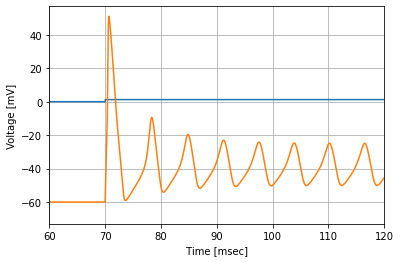

In [0]:
plt.xlabel(" Time [msec] ")
#plt.ylabel(" Current [mA] ")
plt.ylabel(" Voltage [mV] ")

plt.plot(tspan,current, label="Input Current")
plt.plot(tspan,sol[:,0],label ="Voltage output")
#plt.plot(tspan,sol[:,1]**4,label ="n^4 : K+ activation")
#plt.plot(tspan,sol[:,2]**3,label ="m^3 : Na+ activation ")
#plt.plot(tspan,sol[:,3],label ="h : Na+ inactivation")
plt.xlim(60,domain)
plt.grid()
#plt.legend()
plt.savefig("Poisson voltage rate 032")

